In [2]:
import pandas as pd 
##Abrimos los archivos correspondientes y los colocamos en Dataframes a cada uno

df = pd.read_csv ('DIM_CATEGORY (2).csv')
df1 = pd.read_csv ('FACT_SALES (1).csv')
df2 = pd.read_excel ('DIM_CALENDAR (2).xlsx')
df3 = pd.read_excel('DIM_PRODUCT (1).xlsx')
df4 = pd.read_excel('DIM_SEGMENT (1).xlsx')

# Agrupamos los DataFrames en una lista para procesarlos juntos
dfs = [df, df1, df2, df3, df4]

In [3]:
#Hacemos un resumen de todos los datos importados a los Dataframes
for i, df_temp in enumerate(dfs, start=0):
    print(f"Resumen del DataFrame {i}:\n")
    print(df_temp.info(),"\n")  #tipos de datos
    print("Primeras 5 filas:\n",df_temp.head(),"\n")  #las primeras 5 filas
    print("Estadisticas:\n",df_temp.describe(),"\n")  # Estadisticas

Resumen del DataFrame 0:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_CATEGORY  5 non-null      int64 
 1   CATEGORY     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes
None 

Primeras 5 filas:
    ID_CATEGORY                        CATEGORY
0            1  FABRIC TREATMENT and SANIT\r\n
1            2                       AIR CARE 
2            3                    LAVAVAJILLAS
3            4                MEGA SUPERFICIES
4            5             LAVATORY CARE & BRC 

Estadisticas:
        ID_CATEGORY
count     5.000000
mean      3.000000
std       1.581139
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000 

Resumen del DataFrame 1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 6 columns):
 #   Column          

In [6]:
#Debemos renombrar la columna "CATEGORY" ya que no coinciden con las otras columnas de "CATEGORY" en los otros dfs
df.rename(columns={'CATEGORY': 'CATEGORY_PRODUCTS'}, inplace=True)

In [8]:
#Corrigiendo valores nulos: Primero veamos si hay
for i, df_temp in enumerate(dfs, start=0):
    print(f"Dataframe {i} :\n")
    print(df_temp.isnull().sum(),"\n")

Dataframe 0 :

ID_CATEGORY          0
CATEGORY_PRODUCTS    0
dtype: int64 

Dataframe 1 :

WEEK                           0
ITEM_CODE                      0
TOTAL_UNIT_SALES               0
TOTAL_VALUE_SALES              0
TOTAL_UNIT_AVG_WEEKLY_SALES    0
REGION                         0
dtype: int64 

Dataframe 2 :

WEEK           0
YEAR           0
MONTH          0
WEEK_NUMBER    0
DATE           0
dtype: int64 

Dataframe 3 :

MANUFACTURER        0
BRAND               0
ITEM                2
ITEM_DESCRIPTION    0
CATEGORY            0
FORMAT              0
ATTR1               6
ATTR2               0
ATTR3               6
dtype: int64 

Dataframe 4 :

CATEGORY    0
ATTR1       0
ATTR2       0
ATTR3       1
FORMAT      0
SEGMENT     0
dtype: int64 



In [10]:
#Encontramos unos cuantos valores nulos en 4 columnas, al todos ser texto vamos a cambiarlos por la palabra "Desconocido"
df3['ITEM'] = df3['ITEM'].fillna('Desconocido')
df3['ATTR1'] = df3['ATTR1'].fillna('Desconocido')
df3['ATTR3'] = df3['ATTR3'].fillna('Desconocido')
df4['ATTR3'] = df4['ATTR3'].fillna('Desconocido')

In [12]:
#Revisando si hay valores duplicados
for i, df_temp in enumerate(dfs, start=0):
    print(f"Dataframe {i} :\n")
    print(df_temp.duplicated().sum(),"\n")

Dataframe 0 :

0 

Dataframe 1 :

0 

Dataframe 2 :

0 

Dataframe 3 :

0 

Dataframe 4 :

0 



In [14]:
#Al no haber valores duplicados seguimos con unir los data frames relevantes
#Vamos a unir la tabla de fechas con la tabla de ventas que tendria sentido
df_VC = df1.merge(df2, on="WEEK", how="left")
df_VC

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR,MONTH,WEEK_NUMBER,DATE
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,2022,8,34,2022-08-28
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,2022,8,34,2022-08-28
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,2022,8,34,2022-08-28
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,2022,8,34,2022-08-28
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,2022,8,34,2022-08-28
...,...,...,...,...,...,...,...,...,...,...
121997,26-23,7501058792778BP1,1.192,150.829,4.000,TOTAL AUTOS SCANNING MEXICO,2023,7,26,2023-07-03
121998,26-23,7501058757630,1.947,235.416,2.797,TOTAL AUTOS SCANNING MEXICO,2023,7,26,2023-07-03
121999,26-23,7501058753441,18.013,429.289,9.102,TOTAL AUTOS SCANNING MEXICO,2023,7,26,2023-07-03
122000,26-23,7702626204208BP1,21.152,210.276,22.172,TOTAL AUTOS SCANNING MEXICO,2023,7,26,2023-07-03


In [16]:
#Ahora vamos a unir df4 y df3 al tener las categorias y segmentos y df3 a parte de tener tablas en comun tienen los productos
df_PC = df3.merge(df4, on=["CATEGORY", "ATTR1", "ATTR2", "ATTR3", "FORMAT"], how="outer")
df_PC

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3,SEGMENT
0,INDS. ALEN,CLORALEX,7501025401061,CLORALEX BAMBINO BOT PLAST 950ML NAL 750102540...,1,LIQUIDO,CLORO,CLORO,BAMBINO,BLEACH
1,NaN,NaN,NaN,NaN,1,LIQUIDO,CLORO,CLORO,Desconocido,BLEACH
2,INDS. ALEN,CLORALEX,7501025400767,CLORALEX CLORO GERMICIDA REGULAR 950 ML 750102...,1,LIQUIDO,CLORO,CLORO,GERMICIDA,BLEACH
3,INDS. ALEN,CLORALEX,7501025409470,CLORALEX MASCOTAS LIMP DESINFECT C/CLORO BP C/...,1,LIQUIDO,CLORO,CLORO,MASCOTAS,BLEACH
4,INDS. ALEN,CLORALEX,7501025411893,CLORALEX MASCOTAS LIM C/CLORO+DETERGENTE CITRI...,1,LIQUIDO,CLORO,CLORO,MASCOTAS,BLEACH
...,...,...,...,...,...,...,...,...,...,...
516,RECKITT,LYSOL,7501058717276,LYSOL SANITIZANTE DE ROPA SPORT BOTELLA 1.21 L...,1,LIQUIDO,SANITIZANTE,SANITIZANTE,SANITIZANTE,SANITIZER
517,RECKITT,LYSOL,7501058795892,LYSOL SANITIZANTE DE ROPA CRISP LINEN BOT 1.2 ...,1,LIQUIDO,SANITIZANTE,SANITIZANTE,SANITIZANTE,SANITIZER
518,RECKITT,LYSOL,7501058795908,LYSOL CRISP LINEN SANITIZANTE DE ROPA BOT 2.66...,1,LIQUIDO,SANITIZANTE,SANITIZANTE,SANITIZANTE,SANITIZER
519,RECKITT,LYSOL,7501058797865BP2,LYSOL LAUNDRYSANITIZERPOUCH500M+MMDESINFCRISPL...,1,LIQUIDO,SANITIZANTE,SANITIZANTE,SANITIZANTE,SANITIZER


In [18]:
#Podemos notar que ITEM_CODE e ITEM tienen el mismo tipo de valores, entonces podemos unir estas tablas por esa columna en comun
df_final = df_VC.merge(df_PC, left_on='ITEM_CODE', right_on='ITEM', how='left')
df_final.head()

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR,MONTH,WEEK_NUMBER,DATE,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3,SEGMENT
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,2022,8,34,2022-08-28,RECKITT,VANISH,7501058792808BP2,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,2022,8,34,2022-08-28,RECKITT,VANISH,7501058715883,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,2022,8,34,2022-08-28,RECKITT,VANISH,7702626213774,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,2022,8,34,2022-08-28,RECKITT,VANISH,7501058716422,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,2022,8,34,2022-08-28,RECKITT,VANISH,7501058784353,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER


In [20]:
#Al no haber ninguna columna con un formato incorrecto vamos a empezar a escoger nuestras columnas para agrupar y sean utiles para nuestro analisis
df_ventas_por_region = df_final.groupby('REGION')['TOTAL_VALUE_SALES'].sum().reset_index()
df_ventas_por_region

,REGION,TOTAL_VALUE_SALES
0,TOTAL AUTOS AREA 1,714249.979
1,TOTAL AUTOS AREA 2,1188796.150
2,TOTAL AUTOS AREA 3,803655.337
3,TOTAL AUTOS AREA 4,677435.998
4,TOTAL AUTOS AREA 5,1153335.538
5,TOTAL AUTOS AREA 6,983957.571
6,TOTAL AUTOS SCANNING MEXICO,5521429.320


In [22]:
#Ventas por mes
df_ventas_por_mes = df_final.groupby(['YEAR', 'MONTH'])['TOTAL_VALUE_SALES'].sum().reset_index()
df_ventas_por_mes

,YEAR,MONTH,TOTAL_VALUE_SALES
0,2022,1,678440.708
1,2022,2,494535.227
2,2022,3,510052.354
3,2022,4,522004.233
4,2022,5,674949.558
5,2022,6,603800.024
6,2022,7,702062.391
7,2022,8,545441.047
8,2022,9,561226.130
9,2022,10,668951.123


In [24]:
#podriamos unir estas 2 para tener un mejor resultado, como ventas por mes y totales para cada region
df_ventas_por_region_al_mes = df_final.groupby(['YEAR','MONTH','REGION'])['TOTAL_VALUE_SALES'].sum().reset_index()
df_ventas_por_region_al_mes

,YEAR,MONTH,REGION,TOTAL_VALUE_SALES
0,2022,1,TOTAL AUTOS AREA 1,42964.722
1,2022,1,TOTAL AUTOS AREA 2,68856.509
2,2022,1,TOTAL AUTOS AREA 3,49252.452
3,2022,1,TOTAL AUTOS AREA 4,43190.806
4,2022,1,TOTAL AUTOS AREA 5,74138.338
...,...,...,...,...
128,2023,7,TOTAL AUTOS AREA 3,35442.417
129,2023,7,TOTAL AUTOS AREA 4,29178.904
130,2023,7,TOTAL AUTOS AREA 5,48228.236
131,2023,7,TOTAL AUTOS AREA 6,41436.356


In [26]:
#Para que no nos quede un Df de 133 columnas podemos pasar las areas a columnas y usar los valores totales en la tabla
df_VPRM=df_ventas_por_region_al_mes.pivot_table( index=['YEAR', 'MONTH'],columns='REGION', values='TOTAL_VALUE_SALES',aggfunc='sum').reset_index()
df_VPRM

REGION,YEAR,MONTH,TOTAL AUTOS AREA 1,TOTAL AUTOS AREA 2,TOTAL AUTOS AREA 3,TOTAL AUTOS AREA 4,TOTAL AUTOS AREA 5,TOTAL AUTOS AREA 6,TOTAL AUTOS SCANNING MEXICO
0,2022,1,42964.722,68856.509,49252.452,43190.806,74138.338,60817.578,339220.303
1,2022,2,31327.186,50794.285,36168.054,31062.721,52795.479,45119.941,247267.561
2,2022,3,32942.265,53745.305,36937.217,31510.772,54269.117,45621.545,255026.133
3,2022,4,33573.393,56586.410,37859.596,32408.006,54078.964,46495.791,261002.073
4,2022,5,42691.066,75980.249,48400.012,41248.097,70021.732,59133.660,337474.742
5,2022,6,37365.160,66200.440,44773.956,37736.973,65109.682,50713.838,301899.975
6,2022,7,45754.126,78130.841,50831.352,43226.396,71340.876,61747.643,351031.157
7,2022,8,36600.213,61130.852,39611.566,33264.020,54007.576,48106.341,272720.479
8,2022,9,39289.618,62684.592,39470.069,33210.119,55719.002,50239.696,280613.034
9,2022,10,47230.434,74084.864,47986.446,38953.374,66357.629,59862.837,334475.539


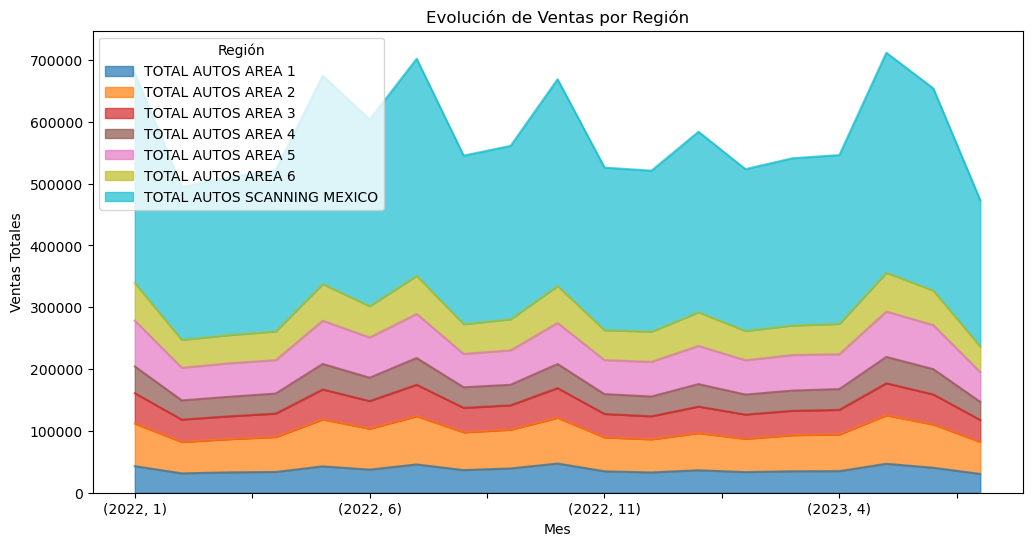

In [28]:
#Y asi tendriamos una mejor vista de los resultados de esta tabla, con una grafica de áreas
import matplotlib.pyplot as plt
df_VPRM.set_index(['YEAR', 'MONTH']).plot(
    kind='area', figsize=(12, 6), alpha=0.7, colormap="tab10"
)
plt.xlabel("Mes")
plt.ylabel("Ventas Totales")
plt.title("Evolución de Ventas por Región")
plt.legend(title="Región", loc="upper left")
plt.show()

In [30]:
df_final.to_csv("DataFrame_final_Tarea1.csv")

In [32]:
df_VPRM

REGION,YEAR,MONTH,TOTAL AUTOS AREA 1,TOTAL AUTOS AREA 2,TOTAL AUTOS AREA 3,TOTAL AUTOS AREA 4,TOTAL AUTOS AREA 5,TOTAL AUTOS AREA 6,TOTAL AUTOS SCANNING MEXICO
0,2022,1,42964.722,68856.509,49252.452,43190.806,74138.338,60817.578,339220.303
1,2022,2,31327.186,50794.285,36168.054,31062.721,52795.479,45119.941,247267.561
2,2022,3,32942.265,53745.305,36937.217,31510.772,54269.117,45621.545,255026.133
3,2022,4,33573.393,56586.410,37859.596,32408.006,54078.964,46495.791,261002.073
4,2022,5,42691.066,75980.249,48400.012,41248.097,70021.732,59133.660,337474.742
5,2022,6,37365.160,66200.440,44773.956,37736.973,65109.682,50713.838,301899.975
6,2022,7,45754.126,78130.841,50831.352,43226.396,71340.876,61747.643,351031.157
7,2022,8,36600.213,61130.852,39611.566,33264.020,54007.576,48106.341,272720.479
8,2022,9,39289.618,62684.592,39470.069,33210.119,55719.002,50239.696,280613.034
9,2022,10,47230.434,74084.864,47986.446,38953.374,66357.629,59862.837,334475.539
